<a href="https://colab.research.google.com/github/ashfarhangi/Real-Time-Systems/blob/master/RTS_BreakDownUtilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taskset Generator

Note that the user must set bounds on range of period and execution of generate task.

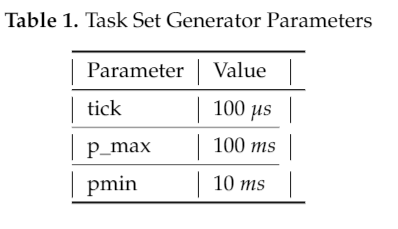

In [31]:
%cd /content/drive/My Drive/Colab Notebooks/0.RTS

/content/drive/My Drive/Colab Notebooks/0.RTS


In [33]:
%%writefile util.py
%load_ext autoreload
%autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from scipy.optimize import fsolve
import sympy as sp
from sympy.solvers import solve
from sympy import Symbol


Writing util.py


In [34]:
%%writefile taskgen.py

class TaskGen:
  def __init__(self):
    self.pmax = 100
    self.pmin =10
  def random_task(self,minP,minE):
    q = (np.random.randint(self.pmin,self.pmax),np.random.randint(1,minE))
    w = (np.random.randint(self.pmin,self.pmax),np.random.randint(1,minE))
    e= (np.random.randint(self.pmin,self.pmax),np.random.randint(1,minE))
    r=  (np.random.randint(self.pmin,self.pmax),np.random.randint(1,minE))
    t = (np.random.randint(self.pmin,self.pmax),np.random.randint(1,minE))
    return q,w,e,r,t

Writing taskgen.py


In [24]:
a = TaskGen()
a.random_task(10,5)

((53, 1), (18, 3), (39, 2), (60, 4), (84, 1))

In [ ]:
def RMUtil(n):
  b = n * (np.power(2,1/n)-1)
  return b

In [ ]:
def hyperPeriod(a,b):
  z = np.lcm(a,b)
  return z

In [ ]:
np.lcm(15,20)

60

In [ ]:
q,w,e,r,t = randomTask(10,5)
# print('util',str()x[]+y[]+))

In [ ]:
cTotal = q[1]+w[1]+e[1]+r[1]+t[1]
uti = q[1]/q[0] + w[1]/w[0] +e[1]/e[0] + r[1]/r[0] + t[1]/t[0] 
if uti <=1:
  print('EDF Scheduable',uti)

EDF Scheduable 0.41815401374224903


In [ ]:
uti

0.41815401374224903

In [ ]:
x = Symbol('x')
solve(x**2 - 1, x)
solve(3 + (x/8)*3-x, x)

[24/5]

In [ ]:
solve(1 + (x/4)*2+((x/12)*3)-x, x)

[4]

In [ ]:
print('w scale',solve((x*uti)-1, x))

w scale [2.39146335353940]


In [ ]:
ContextSwitch = 0.000006

0.41815401374224903

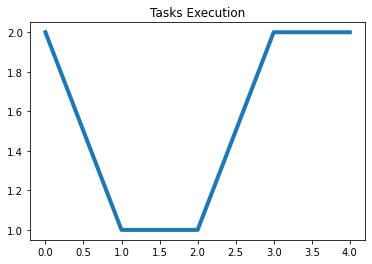

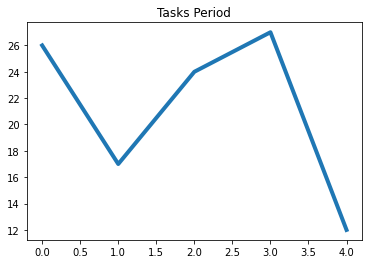

In [ ]:
import matplotlib.pyplot as plt
plt.plot([q[1],w[1],e[1],r[1],t[1]],linewidth=4)
plt.title('Tasks Execution')
plt.show()
plt.plot([q[0],w[0],e[0],r[0],t[0]],linewidth=4)
plt.title('Tasks Period')
plt.show()

In [ ]:
csTime = 0.000006

In [ ]:
import matplotlib.pyplot as plt
plt.plot([q[1],w[1],e[1],r[1],t[1]],linewidth=4)
plt.title('Tasks Execution')
plt.show()
plt.plot([q[0],w[0],e[0],r[0],t[0]],linewidth=4)
plt.title('Tasks Period')
plt.show()

In [ ]:
import numpy as np
FFalse= []

for f in Flist:
  for p in periodList:
    gcd= np.gcd(f,p)
    if(2*f - gcd >p):
      # print('Constrait broken for ',f)
      FFalse.append(f)
    # if(2*f - gcd <= p):

[]

In [ ]:
class EDF():
    """Earliest Deadline First"""
    def on_activate(self, job):
        job.cpu.resched()

    def on_terminated(self, job):
        job.cpu.resched()

    def schedule(self, cpu):
        # List of ready jobs not currently running:
        ready_jobs = [t.job for t in self.task_list
                      if t.is_active() and not t.job.is_running()]

        if ready_jobs:
            # Select a free processor or, if none,
            # the one with the greatest deadline (self in case of equality):
            key = lambda x: (
                1 if not x.running else 0,
                x.running.absolute_deadline if x.running else 0,
                1 if x is cpu else 0
            )
            cpu_min = max(self.processors, key=key)

            # Select the job with the least priority:
            job = min(ready_jobs, key=lambda x: x.absolute_deadline)

            if (cpu_min.running is None or
                    cpu_min.running.absolute_deadline > job.absolute_deadline):
                print(self.sim.now(), job.name, cpu_min.name)
                return (job, cpu_min)


In [ ]:
from fractions import gcd
import math
class Node:
  def __init__(self):
    self.name = None
    self.absD = None
    self.execT = None
    self.next = None

class LinkedList:
  def __init__(self):
    self.head = None

  def addNode(self, absD, execT, name):
    curr = self.head
    if curr is None:
      n = Node()
      n.absD = absD
      n.name = name
      n.execT = execT
      self.head = n
      return

    if curr.absD > absD:
      n = Node()
      n.absD = absD
      n.name = name
      n.execT = execT
      n.next = curr
      self.head = n
      return

    if curr.absD == absD:
      n = Node()
      n.absD = absD
      n.name = name
      n.execT = execT
      if int(curr.name[1]) > int(name[1]):
              n.next = curr
              self.head = n
              return
      while curr.next is not None:
        if int(curr.name[1]) > int(name[1]):
          break
        curr = curr.next
      n.next = curr.next
      curr.next = n
      return

    while curr.next is not None:
      if curr.next.absD > absD:
        break
      if curr.next.absD == absD:
      curr = curr.next
    n = Node()
    n.absD = absD
    n.name = name
    n.execT = execT
    n.next = curr.next
    curr.next = n
    return

  def removeHead(self):
    curr = self.head
    self.head = curr.next

period = [3, 5, 8]
relD = [3, 5, 8]
execT = [1, 2, 3]
interval = 32

print "-------------------------------------"
for i in range(1, len(period)+1):
        vNum = interval / period[i-1]
	if(0 != (interval % period[i-1])):
		vNum+=1
        for j in range(0, vNum):
                vName = "T" + str(i) + "J" + str(j+1)
		print " %s" % vName,
	print

jobList = LinkedList() 
for i in range(0, interval+1):
	for j in range(0, len(period)):
		if(0 == (i % period[j])):
			vName = ("T"+ str(j+1) + "J" + str((i / period[j]) + 1))
			'''
			print i,j+1, i+relD[j], period[j],
			print "%s" % vName 
			'''
			jobList.addNode(i+relD[j], execT[j], vName)

	head = jobList.head
	print "* Time %2d: %s: [%d, %d] " % (i, head.name, head.execT, head.absD), 
	if(i >= head.absD):
		print "-> Deadline Missed ",
	print "-> Queue:",
	while head is not None:
		print "%s[%d,%d]" % (head.name, (head.execT),(head.absD)),
		head = head.next
	print
	head = jobList.head
	head.execT -= 1
	if(0 == head.execT):
		jobList.removeHead()



In [ ]:
3/10 + 4/16 + 1/4+2/50

0.8400000000000001